# 01 Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate a suspended library or feature

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear

In [2]:
# establish path

path = path = r'/Users/martyna/Documents/CF Data Analysis/Data Immersion/Achievement 6/COVID Analysis 8.22'

In [3]:
# import data 

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','covid_merged.csv'), index_col = False)

# 02 Data wrangling

In [4]:
df.head()

,Unnamed: 0,county,state,county_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated,total_doses_given,doses_per_100k,percent_with_at_least_one_dose,people_fully_vaccinated,percent_fully_vaccinated,total_cases,case_rate_per_100k,total_deaths,death_rate_per_100k,total_percent_positive
0,0,American Samoa,American Samoa,47392.0,0.0,2.1,156.14,Low,3/3/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
1,1,American Samoa,American Samoa,47392.0,0.9,19.0,434.67,High,3/10/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
2,2,American Samoa,American Samoa,47392.0,1.0,6.3,901.00,Medium,3/17/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
3,3,American Samoa,American Samoa,47392.0,10.4,0.0,1093.01,High,4/14/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
4,4,American Samoa,American Samoa,47392.0,4.1,80.2,267.98,High,4/21/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN


In [5]:
df.rename(columns = {'date_updated' : 'date'}, inplace = True)

### Data set includes data from February to August 2022, will perform analysis on monthly scale

In [6]:
# create subset with 'date' and median 'covid_cases_per_100k'

data = df.groupby('date').agg({'covid_cases_per_100k': ['median']})

In [7]:
data.head()

,covid_cases_per_100k
,median
date,
2/24/22,156.810
3/10/22,61.805
3/17/22,40.485
3/24/22,30.775
3/3/22,101.005


In [8]:
# checking data types

data.dtypes

covid_cases_per_100k  median    float64
dtype: object

In [9]:
data

,covid_cases_per_100k
,median
date,
2/24/22,156.810
3/10/22,61.805
3/17/22,40.485
3/24/22,30.775
3/3/22,101.005
3/31/22,25.620
4/14/22,22.460
4/21/22,26.760


Date is set as index

In [10]:
data.shape

(25, 1)

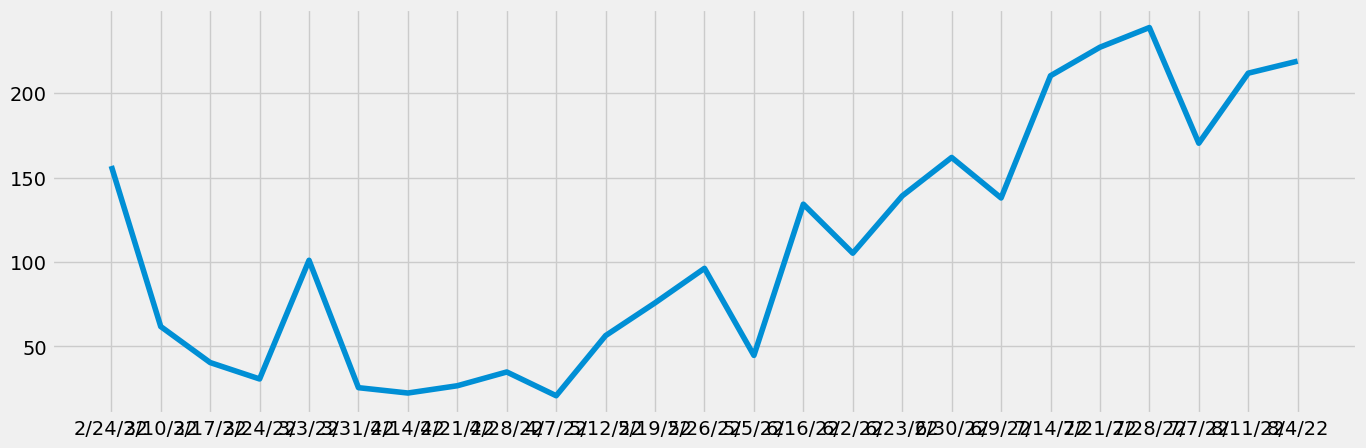

In [11]:
# plot data using matlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### Data cleaning performed in prior tasks.

# 03 Time-series analysis: decomposition

In [12]:
# decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive', period = 6)

In [13]:
from pylab import rcParams # define a fixed size for all special charts

rcParams['figure.figsize'] = 18, 7

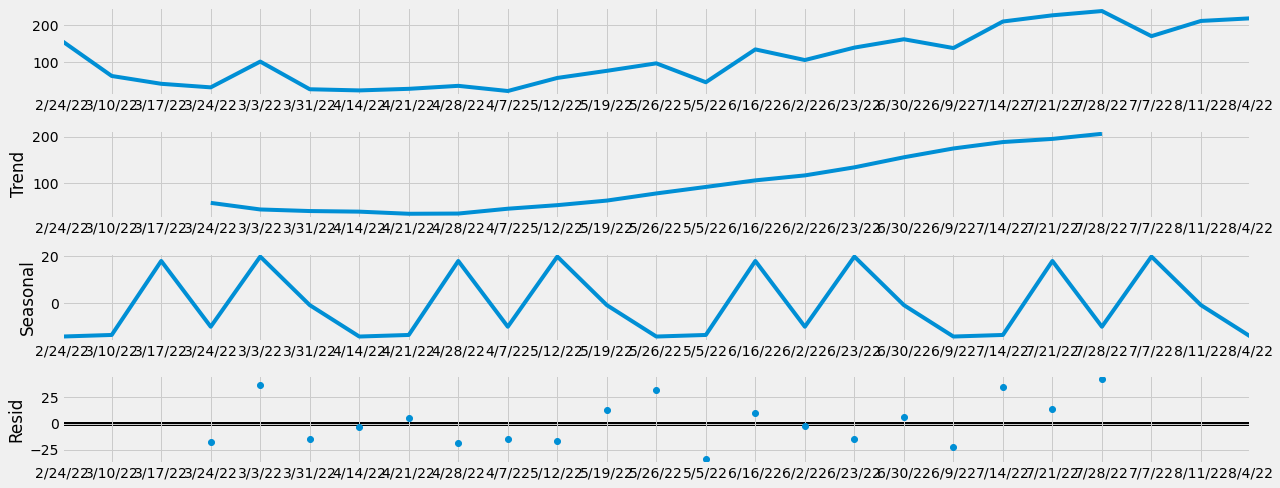

In [14]:
# plot the separate components

decomposition.plot()
plt.show()

The decomposition shows an upward trend of COVID-19 cases per 100k from February to August 2022. The trend line looks different from the original data because the original data is unsmoothed. There appears to be some cyclical spikes on the seasonality chart, however I am skeptical to beleive that every month there are spikes in COVID-19 cases in such a uniform manner. 

# 04 Testing for stationarity

In [16]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['covid_cases_per_100k'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.340134
p-value                         0.919625
Number of Lags Used             1.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


The test statistic of -0.340134 is larger than the critical value (5%) of -2.998500, therefore the hypothesis cannot be rejected.

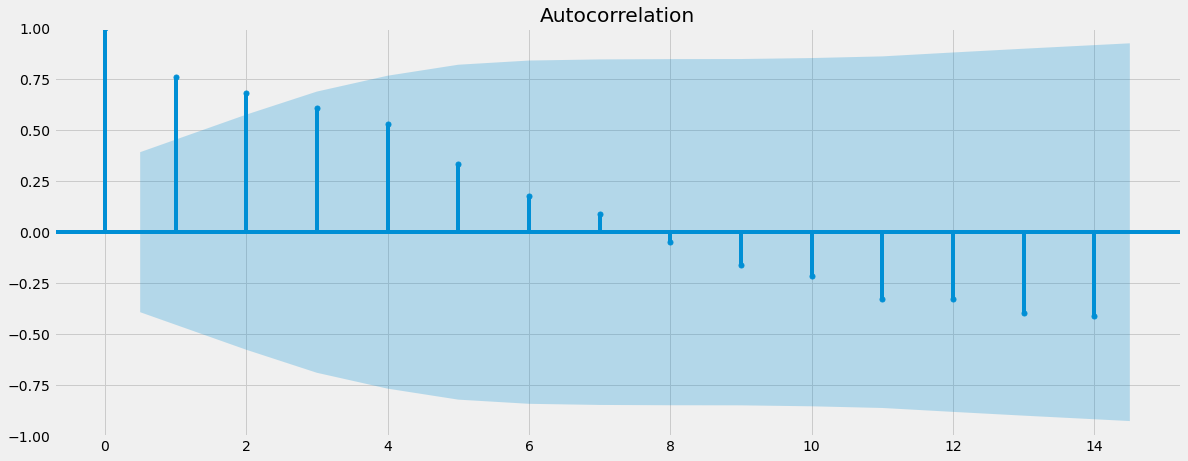

In [17]:
# check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

The test shows multiple blue lines outside of the confidence interval, meaning the lags are significantly correlated and the data is nonstationary.

# 05 Stationarizing data

In [18]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = data - data.shift(1)

In [19]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [20]:
data_diff.head()

,covid_cases_per_100k
,median
date,
3/10/22,-95.005
3/17/22,-21.320
3/24/22,-9.710
3/3/22,70.230
3/31/22,-75.385


In [21]:
data_diff.columns

MultiIndex([('covid_cases_per_100k', 'median')],
           )

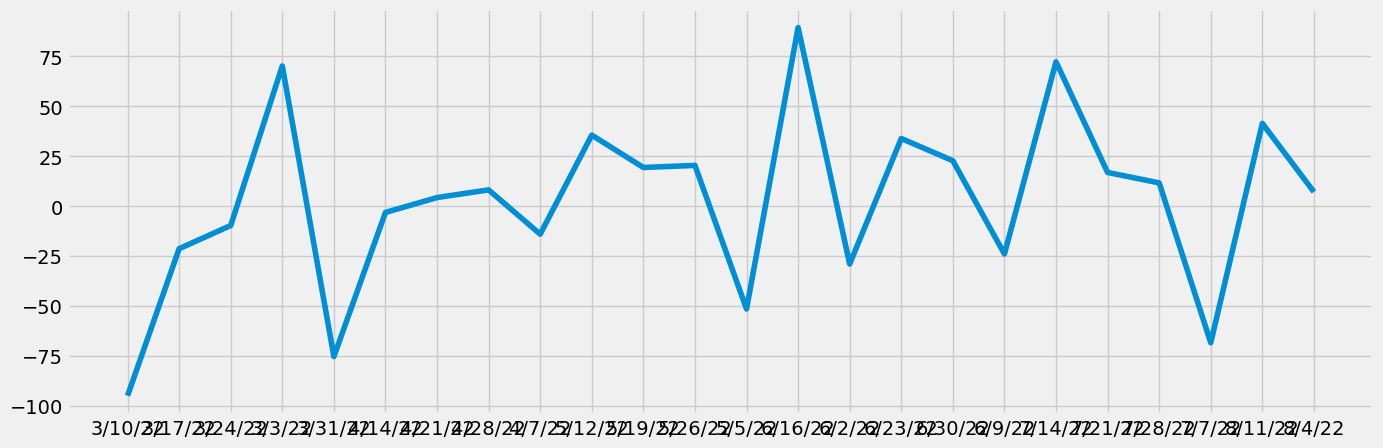

In [22]:
# check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [23]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.390235e+00
p-value                        8.036668e-11
Number of Lags Used            0.000000e+00
Number of Observations Used    2.300000e+01
Critical Value (1%)           -3.752928e+00
Critical Value (5%)           -2.998500e+00
Critical Value (10%)          -2.638967e+00
dtype: float64


The results show a test statistic of -7.390235e+00 which is smaller than the critical value (5%) of -2.998500e+00. Therefore the hypothesis can be rejected. 

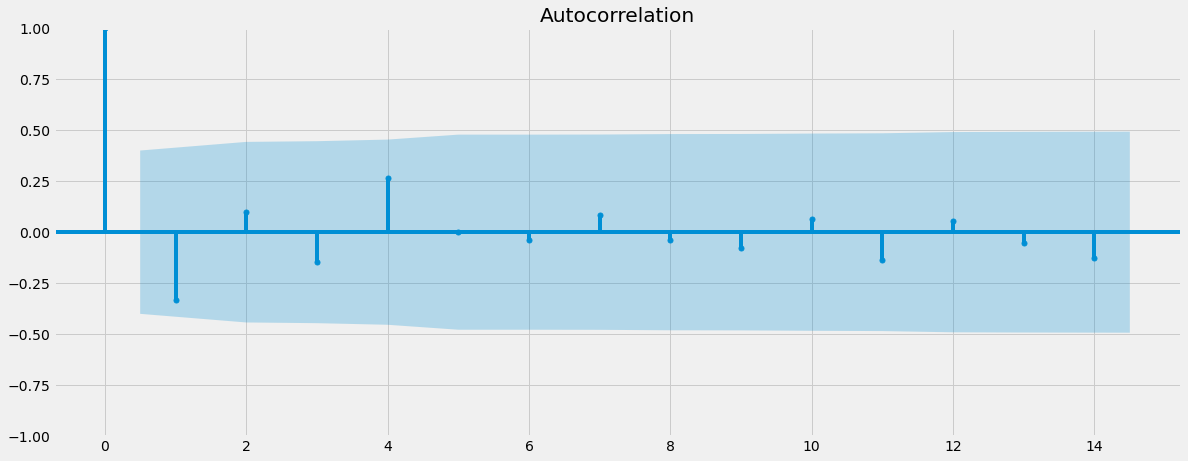

In [24]:
# plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

The correlation has improved, no lag lines present outside of the confidence interval. 